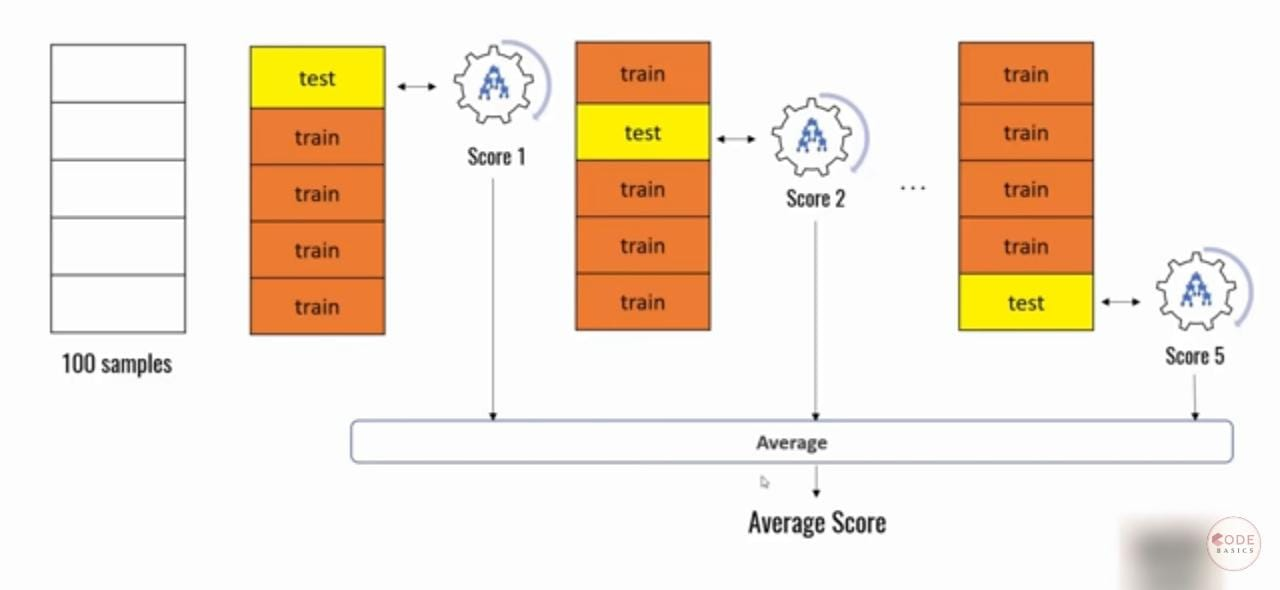

In [17]:
from IPython.display import Image
Image('/home/adish/Downloads/kkfold.jpeg')

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [3]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits.data,digits.target,test_size=0.3)


###  LOGISTIC REGRESSION

In [4]:
#solver:Algorithm to use in the optimization problem.
#LIBLINEAR is a linear classifier for data with millions of instances and features
#One-vs-Rest (OvR)
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.9685185185185186

### svm

In [5]:
svm = SVC(gamma='auto')
svm.fit(xtrain, ytrain)
svm.score(xtest, ytest)
#gamma{‘scale’, ‘auto’} or float, default=’scale’
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

0.4722222222222222

### RANDOM FOREST

In [6]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

0.9814814814814815

### here Random forest is having the higher accuracy, but each time when train_test_split is called the data sample changes

# K FOLD CROSS VALIDATION

### Cross Validation: Splits the data into k "random" folds

### Stratified Cross Valiadtion: Splits the data into k folds, making sure each fold is an appropriate representative of the original data. (class distribution, mean, variance, etc)

we can use a version of k-fold cross-validation that preserves the imbalanced class distribution in each fold. It is called stratified k-fold cross-validation and will enforce the class distribution in each split of the data to match the distribution in the complete training dataset.

Example of 5 fold Cross Validation:

### k fold cross validation

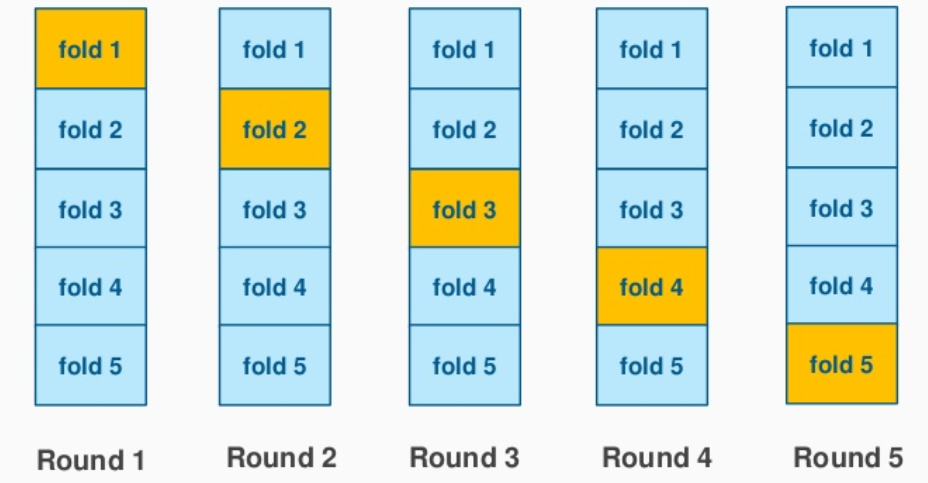

In [13]:
from IPython.display import Image
Image('/home/adish/Downloads/kfold.png')

### stratified k fold cross validation

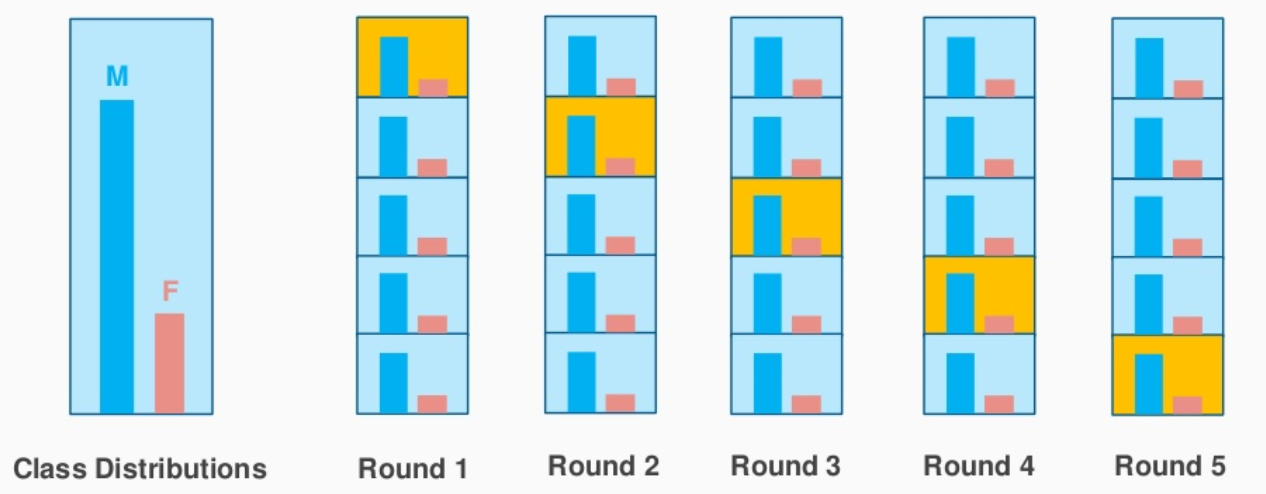

In [14]:
from IPython.display import Image
Image('/home/adish/Downloads/skfold.png')

In [7]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [8]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):#INSIDE kf.split..specify dataset values
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In the first fold [3 4 5 6 7 8]  was made training set and [0 1 2] as test set.

In [9]:
def get_score(model, xtrain, xtest, ytrain, ytest):#function for calculating the accuracy of each model.
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

In [10]:
get_score(LogisticRegression(solver='liblinear',multi_class='ovr'),xtrain,xtest,ytrain,ytest)

0.9685185185185186

### Manual implementation

In [18]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    xtrain, xtest, ytrain, ytest = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), xtrain, xtest, ytrain, ytest))  
    scores_svm.append(get_score(SVC(gamma='auto'), xtrain, xtest, ytrain, ytest))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), xtrain, xtest, ytrain, ytest))

In [19]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [22]:
scores_rf  #best model

[0.9282136894824707, 0.9432387312186978, 0.9315525876460768]

In [21]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

### Implementation using library

In [30]:

from sklearn.model_selection import cross_val_score
#cv-->Determines the cross-validation splitting strategy

In [34]:
l=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
l

array([0.89482471, 0.95325543, 0.90984975])

In [35]:
np.average(l)

0.9193099610461881

In [36]:
s=cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)
s

array([0.38063439, 0.41068447, 0.51252087])

In [37]:
np.average(s)

0.4346132442960489

In [38]:
r=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
r

array([0.92654424, 0.94991653, 0.91986644])

In [39]:
np.average(r)

0.9321090706733445